<a href="https://colab.research.google.com/github/sageh9120/MSSP-6070/blob/main/week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-263635854.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  congressional_districts['centroid'] = congressional_districts.geometry.centroid



Visualization complete. Saved as 'CA_Congressional_Districts_Visualization.png'.


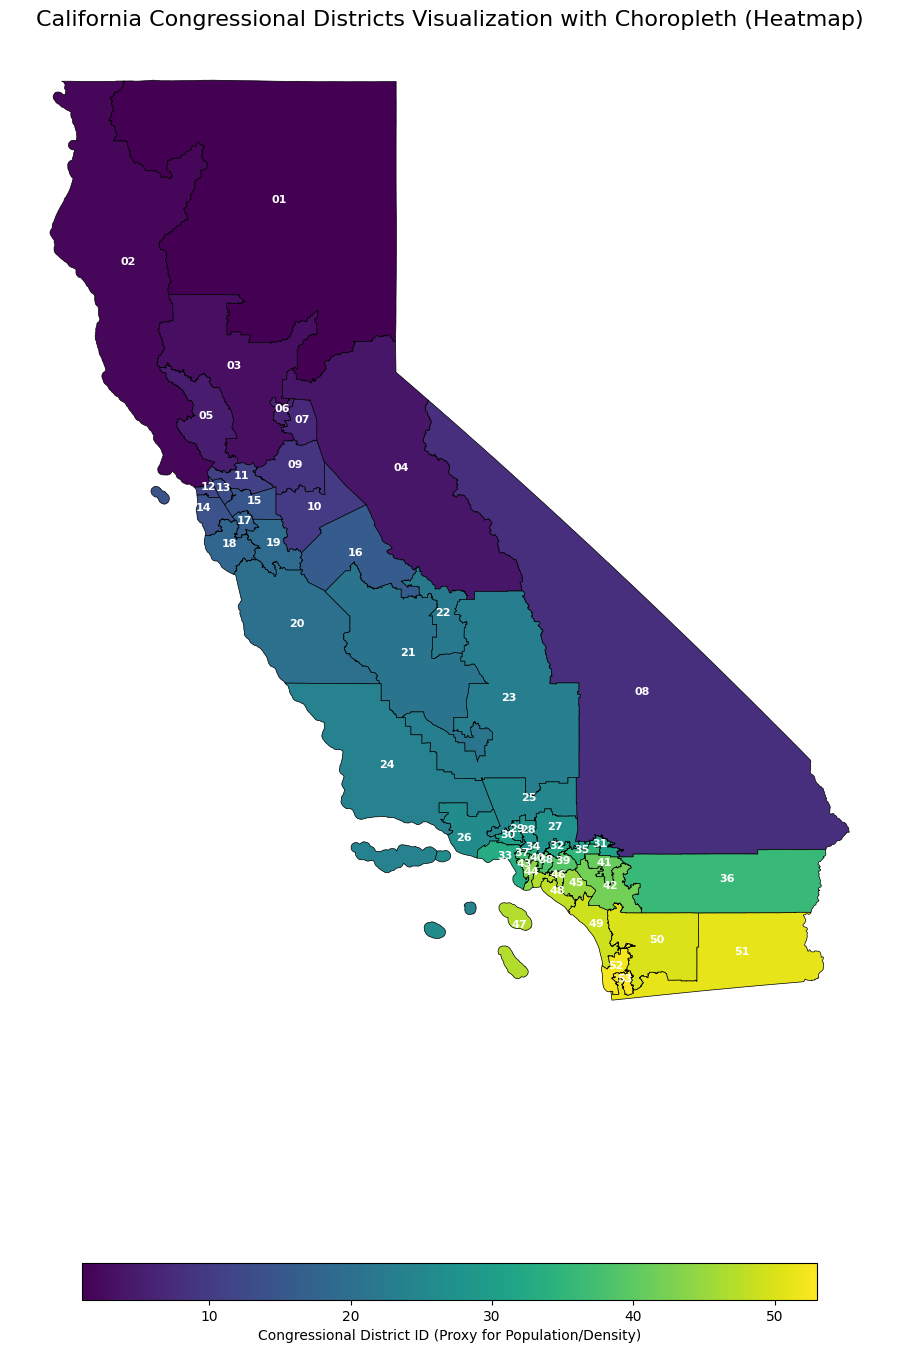

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the path for the data files
CONGRESSIONAL_FILE = 'california-congressional-districts.geojson'
LEGISLATIVE_FILE = 'CA_Legislative_Districts.csv'

# --- 1. Load and Prepare Data ---

# Load the Congressional Districts GeoJSON (The map boundaries)
congressional_districts = gpd.read_file(CONGRESSIONAL_FILE)

# Load the Legislative Districts CSV (The population data)
legislative_data = pd.read_csv(LEGISLATIVE_FILE)

# Prepare Congressional Data for Choropleth (Heatmap Effect)
# To create a Choropleth, we need a numeric column. We'll convert the district name string ('01', '02', etc.)
# into an integer for sequential coloring.
congressional_districts['ID_NUM'] = congressional_districts['Name'].astype(int)

# Calculate the centroid for labeling
congressional_districts['centroid'] = congressional_districts.geometry.centroid


# --- 2. Create Visualization (Tasks 1, 2, & 3) ---

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the Choropleth Map (Congressional Districts as boundaries, colored by ID number)
# This fulfills Task 1 (Visualization of Districts) and Task 3 (Heatmap effect).
congressional_districts.plot(
    column='ID_NUM',  # Use ID_NUM for sequential coloring (the Choropleth/Heatmap effect)
    ax=ax,
    legend=True,
    cmap='viridis',  # 'viridis' is a good color map for continuous data
    edgecolor='black',
    linewidth=0.5,
    legend_kwds={
        'label': "Congressional District ID (Proxy for Population/Density)",
        'orientation': "horizontal",
        'shrink': 0.5
    }
)

# Overlay District Labels (Task 2: Overlaying context/data)
# We plot the Congressional District numbers at the centroid of each district.
for idx, row in congressional_districts.iterrows():
    ax.annotate(
        text=row['Name'],  # Congressional District Number ('01', '02', etc.)
        xy=(row['centroid'].x, row['centroid'].y),
        horizontalalignment='center',
        fontsize=8,
        color='white',
        weight='bold'
    )

# Set map properties
ax.set_title(
    "California Congressional Districts Visualization with Choropleth (Heatmap)",
    fontsize=16
)
ax.set_axis_off() # Turn off latitude and longitude axes for a cleaner map

# Final save
plt.tight_layout()
plt.savefig('CA_Congressional_Districts_Visualization.png')

print("\nVisualization complete. Saved as 'CA_Congressional_Districts_Visualization.png'.")